# Analysis of single-cell TCR repertoires and gene expression from multi-modal scRNA-seq data
From book chapter

In [19]:
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/data/projects/2022/CRCA/results/v0.1/crc-atlas-dataset/latest/ds_analyses/liana_cell2cell/neutrophil_subclusters/tumor_blood/neutrophil.csv")

In [22]:
df_ss = df[df["cell_type"].isin(['B cell','Macrophage', 'Monocyte', 'NK',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory','Cancer cell'])]

In [23]:
df_ss

,Unnamed: 0,cell_type,fraction_expressed,expr_mean,source,target,source_genesymbol,target_genesymbol,lr_means,cellphone_pvals,...,magnitude_rank,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,group,fdr
0,0,Cancer cell,0.576713,4.161232,Cancer cell,Cancer cell,VEGFA,EPHB2,0.239201,0.0,...,0.381204,488.510843,3.216367,0.252804,12.722779,4.418599e-37,2.202221e-35,0.646988,tumor_vs_blood,7.806192e-36
1,1,Cancer cell,0.576713,4.161232,Macrophage,Cancer cell,VEGFA,EPHB2,0.218933,0.0,...,0.468985,488.510843,3.216367,0.252804,12.722779,4.418599e-37,2.202221e-35,0.646988,tumor_vs_blood,7.806192e-36
2,2,Cancer cell,0.576713,4.161232,Mast cell,Cancer cell,VEGFA,EPHB2,0.260421,0.0,...,0.487328,488.510843,3.216367,0.252804,12.722779,4.418599e-37,2.202221e-35,0.646988,tumor_vs_blood,7.806192e-36
3,3,Cancer cell,0.576713,4.161232,Monocyte,Cancer cell,VEGFA,EPHB2,0.384785,0.0,...,0.506716,488.510843,3.216367,0.252804,12.722779,4.418599e-37,2.202221e-35,0.646988,tumor_vs_blood,7.806192e-36
4,4,Cancer cell,0.576713,4.161232,cDC,Cancer cell,VEGFA,EPHB2,0.198957,0.0,...,0.620803,488.510843,3.216367,0.252804,12.722779,4.418599e-37,2.202221e-35,0.646988,tumor_vs_blood,7.806192e-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10877,10877,B cell,0.265693,4.195458,Monocyte,cDC,ICAM1,IL2RG,0.424953,0.0,...,0.371615,1992.206862,2.503059,0.415237,6.028022,1.659786e-09,8.523535e-09,0.686062,tumor_vs_blood,4.009744e-09
10878,10878,B cell,0.265693,4.195458,Endothelial,cDC,ICAM1,IL2RG,0.425568,0.0,...,0.380413,1992.206862,2.503059,0.415237,6.028022,1.659786e-09,8.523535e-09,0.686062,tumor_vs_blood,4.009744e-09
10879,10879,B cell,0.265693,4.195458,Macrophage,T cell CD4,ICAM1,IL2RG,0.408593,0.0,...,0.419573,1992.206862,2.503059,0.415237,6.028022,1.659786e-09,8.523535e-09,0.686062,tumor_vs_blood,4.009744e-09
10880,10880,B cell,0.265693,4.195458,cDC,T cell CD8,ICAM1,IL2RG,0.397014,0.0,...,0.460248,1992.206862,2.503059,0.415237,6.028022,1.659786e-09,8.523535e-09,0.686062,tumor_vs_blood,4.009744e-09


## Neutrophils interactions

In [5]:
df_ss_neutro  = df_ss

In [6]:
df_ss_neutro["cluster_1"] = "Neutrophil"

/tmp/ipykernel_160817/3182691188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_neutro["cluster_1"] = "Neutrophil"


In [7]:
df_ss_neutro["new_column_neutro"]= df_ss_neutro["source_genesymbol"] +  df_ss_neutro["target_genesymbol"] + df_ss_neutro["source"]+df_ss_neutro["cluster_1"]

/tmp/ipykernel_160817/83736731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_neutro["new_column_neutro"]= df_ss_neutro["source_genesymbol"] +  df_ss_neutro["target_genesymbol"] + df_ss_neutro["source"]+df_ss_neutro["cluster_1"]


In [8]:
unique_rows_neutro = df_ss_neutro.drop_duplicates(subset="new_column_neutro")

In [9]:
unique_sources_neutro = unique_rows_neutro['cluster_1'].unique()
unique_targets_neutro = unique_rows_neutro['cell_type'].unique()

In [10]:
interaction_matrix_neutro = pd.DataFrame([(src, tgt) for src in unique_sources_neutro for tgt in unique_targets_neutro], columns=['source', 'target'])

In [11]:
count_df_neutro = unique_rows_neutro.groupby(['cluster_1', 'target']).size().reset_index(name='n')
count_df_neutro.rename(columns = {"cluster_1":"source"}, inplace=True)
interaction_matrix_neutro = interaction_matrix_neutro.merge(count_df_neutro, on=['source', 'target'], how='left').fillna(0)
interaction_matrix_neutro = interaction_matrix_neutro.pivot(index='target', columns='source', values='n').fillna(0)
interaction_matrix_neutro = interaction_matrix_neutro.astype(int)

## All cells interactions

In [12]:
df_ss["new_column"]= df_ss["source_genesymbol"] +  df_ss["target_genesymbol"] + df_ss["source"]+df_ss["target"]

/tmp/ipykernel_160817/2765319709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss["new_column"]= df_ss["source_genesymbol"] +  df_ss["target_genesymbol"] + df_ss["source"]+df_ss["target"]


In [13]:
unique_rows = df_ss.drop_duplicates(subset="new_column")

In [14]:
unique_sources = unique_rows['cell_type'].unique()
unique_targets = unique_rows['cell_type'].unique()

In [15]:
interaction_matrix = pd.DataFrame([(src, tgt) for src in unique_sources for tgt in unique_targets], columns=['source', 'target'])
count_df = unique_rows.groupby(['source', 'target']).size().reset_index(name='n')
interaction_matrix = interaction_matrix.merge(count_df, on=['source', 'target'], how='left').fillna(0)
interaction_matrix = interaction_matrix.pivot(index='target', columns='source', values='n').fillna(0)
interaction_matrix = interaction_matrix.astype(int)

In [16]:
interaction_matrix["Neutrophil"]=list(interaction_matrix_neutro["Neutrophil"])

In [17]:
interaction_matrix = interaction_matrix.T

Text(95.72222222222221, 0.5, 'Source')

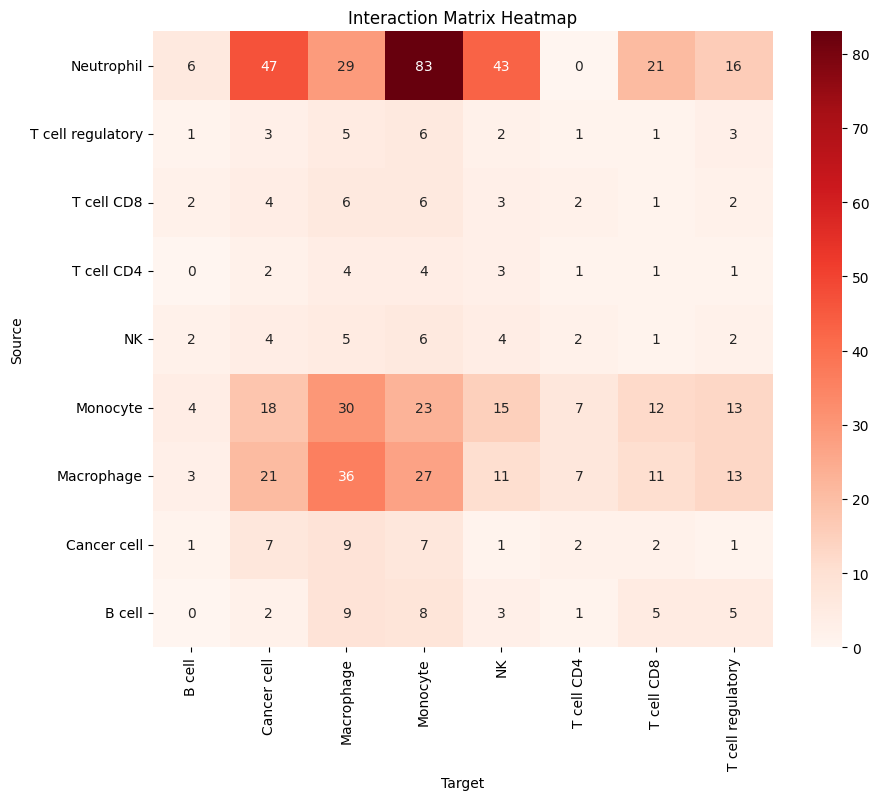

In [18]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(interaction_matrix, annot=True, fmt="d", cmap="Reds", cbar=True)
heatmap.invert_yaxis()
# Adding labels and title
plt.title('Interaction Matrix Heatmap')
plt.xlabel('Target')
plt.ylabel('Source')